In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
df = pd.read_csv("storms.csv")

## Cleaning the Data

In [6]:
df.head()

,Unnamed: 0,name,year,month,day,hour,lat,long,status,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter
0,1,Amy,1975,6,27,0,27.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN
1,2,Amy,1975,6,27,6,28.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN
2,3,Amy,1975,6,27,12,29.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN
3,4,Amy,1975,6,27,18,30.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN
4,5,Amy,1975,6,28,0,31.5,-78.8,tropical depression,NaN,25,1012,NaN,NaN


The index numbers in the original .csv file have been read into an additional column, creating a redundancy.

In [8]:
df = df.drop('Unnamed: 0',axis=1)

In [9]:
df.head()

,name,year,month,day,hour,lat,long,status,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter
0,Amy,1975,6,27,0,27.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN
1,Amy,1975,6,27,6,28.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN
2,Amy,1975,6,27,12,29.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN
3,Amy,1975,6,27,18,30.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN
4,Amy,1975,6,28,0,31.5,-78.8,tropical depression,NaN,25,1012,NaN,NaN


Redundant column has been dropped.

Force diameter is null in all rows before 2004. Because it is not a necessary attribute for the purpose of this project, both force diameter columns can be dropped.

In [12]:
df = df.drop('tropicalstorm_force_diameter',axis=1)
df = df.drop('hurricane_force_diameter',axis=1)

In [13]:
df.head()

,name,year,month,day,hour,lat,long,status,category,wind,pressure
0,Amy,1975,6,27,0,27.5,-79.0,tropical depression,NaN,25,1013
1,Amy,1975,6,27,6,28.5,-79.0,tropical depression,NaN,25,1013
2,Amy,1975,6,27,12,29.5,-79.0,tropical depression,NaN,25,1013
3,Amy,1975,6,27,18,30.5,-79.0,tropical depression,NaN,25,1013
4,Amy,1975,6,28,0,31.5,-78.8,tropical depression,NaN,25,1012


Checking for NULL values:

In [15]:
df.isna().sum()

name            0
year            0
month           0
day             0
hour            0
lat             0
long            0
status          0
category    14382
wind            0
pressure        0
dtype: int64

NULL values in the 'category' column can be assumed as non-hurricanes. For the purpose of grouping the data, they can be considered Category 0.

In [17]:
df['category'] = df['category'].fillna(0)

In [18]:
df.head()

,name,year,month,day,hour,lat,long,status,category,wind,pressure
0,Amy,1975,6,27,0,27.5,-79.0,tropical depression,0.0,25,1013
1,Amy,1975,6,27,6,28.5,-79.0,tropical depression,0.0,25,1013
2,Amy,1975,6,27,12,29.5,-79.0,tropical depression,0.0,25,1013
3,Amy,1975,6,27,18,30.5,-79.0,tropical depression,0.0,25,1013
4,Amy,1975,6,28,0,31.5,-78.8,tropical depression,0.0,25,1012


## Visualizing the Data

**Line Graph Mapping Relationship Between Wind and Pressure in Storm Phenomena Recorded Between 1975 and 2021**

<Axes: xlabel='pressure', ylabel='wind'>

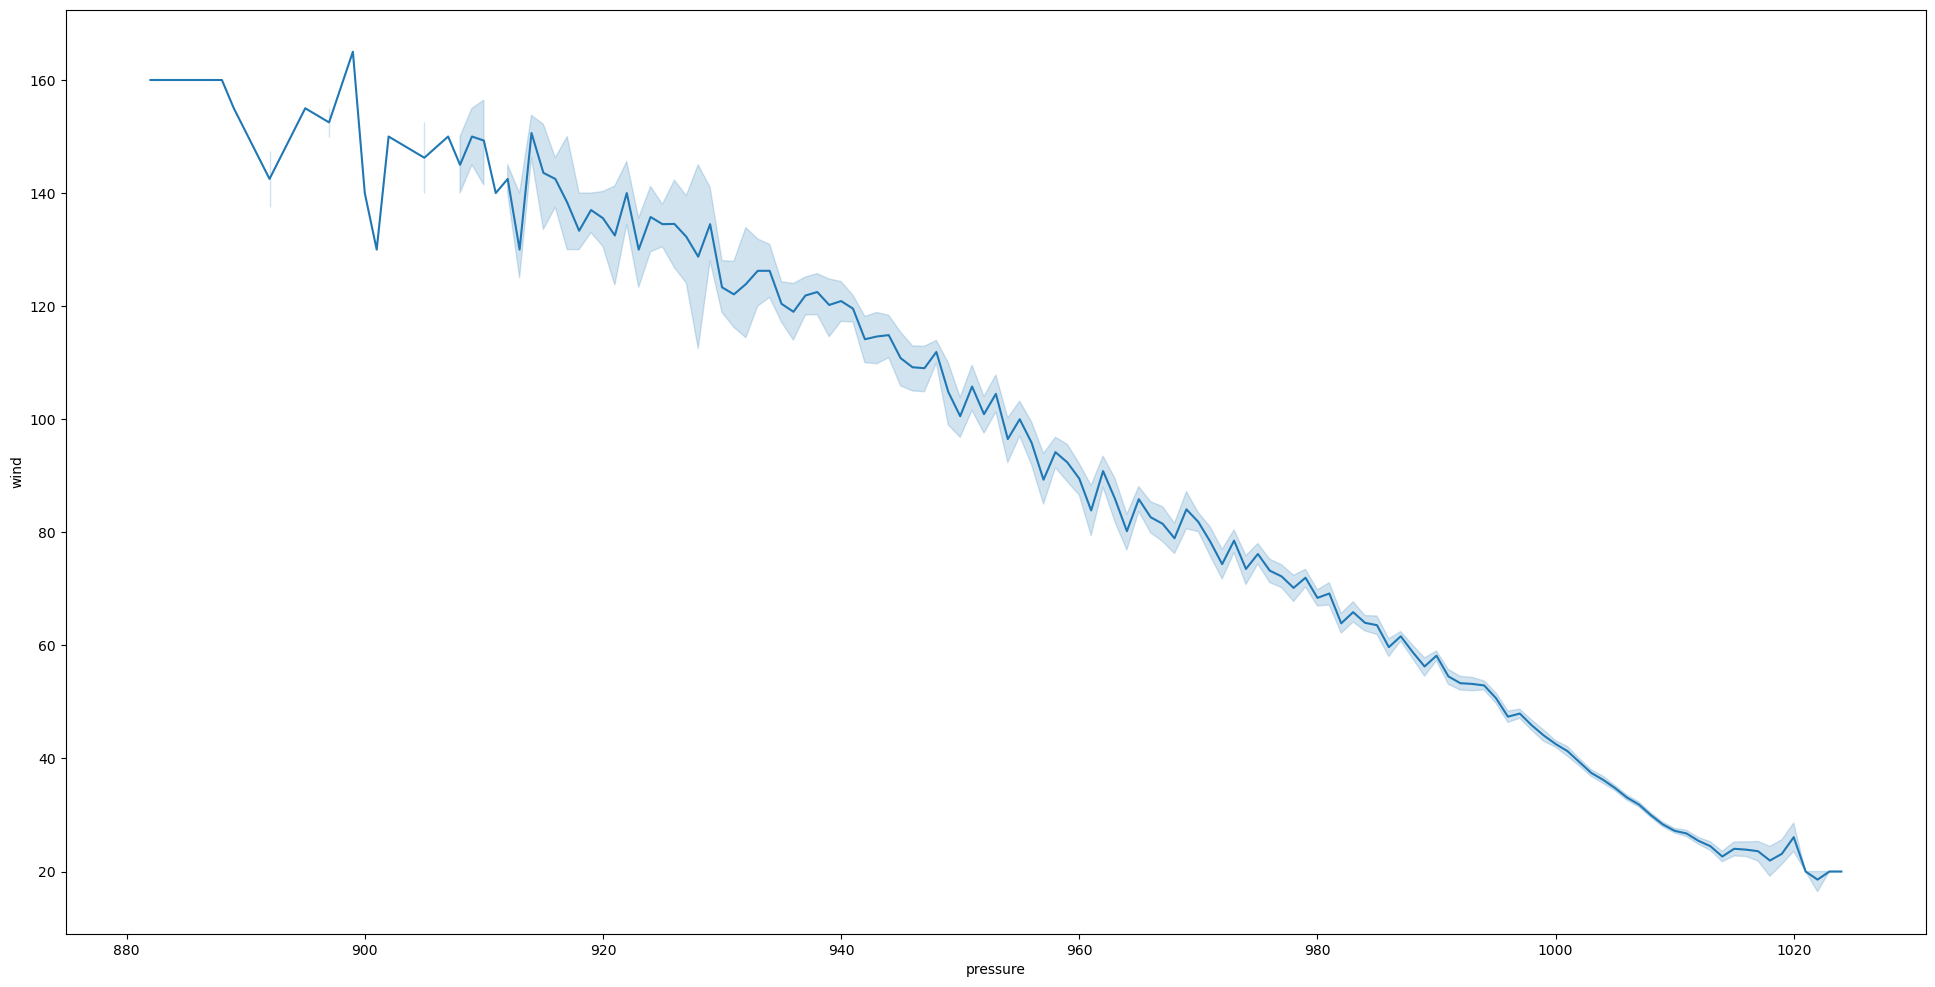

In [21]:
plt.rcParams['figure.figsize']=(24,12)
sns.lineplot(data=df, x='pressure',y='wind')

The first visualizations will aim to display the frequency of each type of Atlantic storm.

**Bar Chart Showing the Number of Atlantic Storm Occurrences Each Year from 1975 to 2021**:

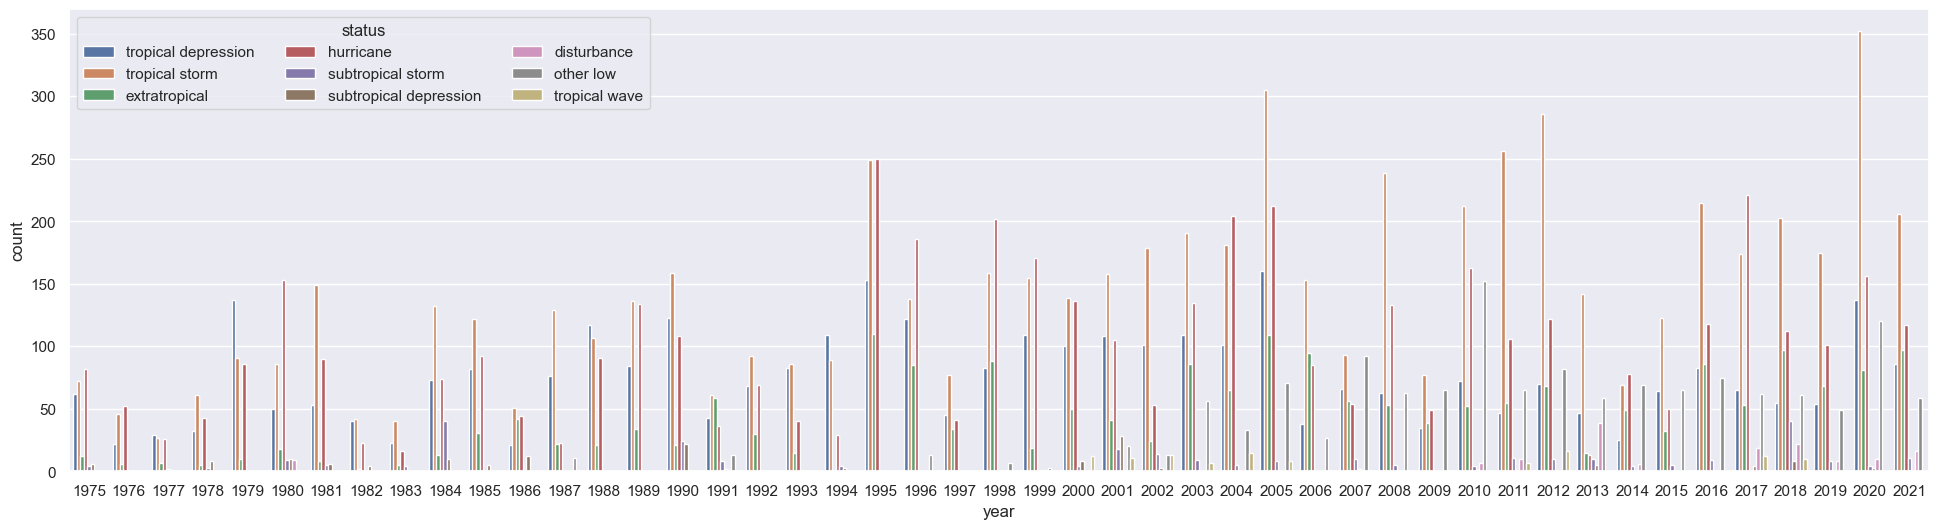

In [24]:
sns.set(rc={'figure.figsize':(24, 6)})
all_ycount = sns.countplot(data=df, x='year', hue='status')
sns.move_legend(all_ycount, "upper left", ncol=3)
plt.show(all_ycount)

The bar chart above is a little difficult to read due to the number of values in the x-axis. A more compact visualization can be made:

**Bar Chart Showing Number of Atlantic Storm Occurrences By Decade from 1975 to 2021**:

<Axes: xlabel='year_range', ylabel='count'>

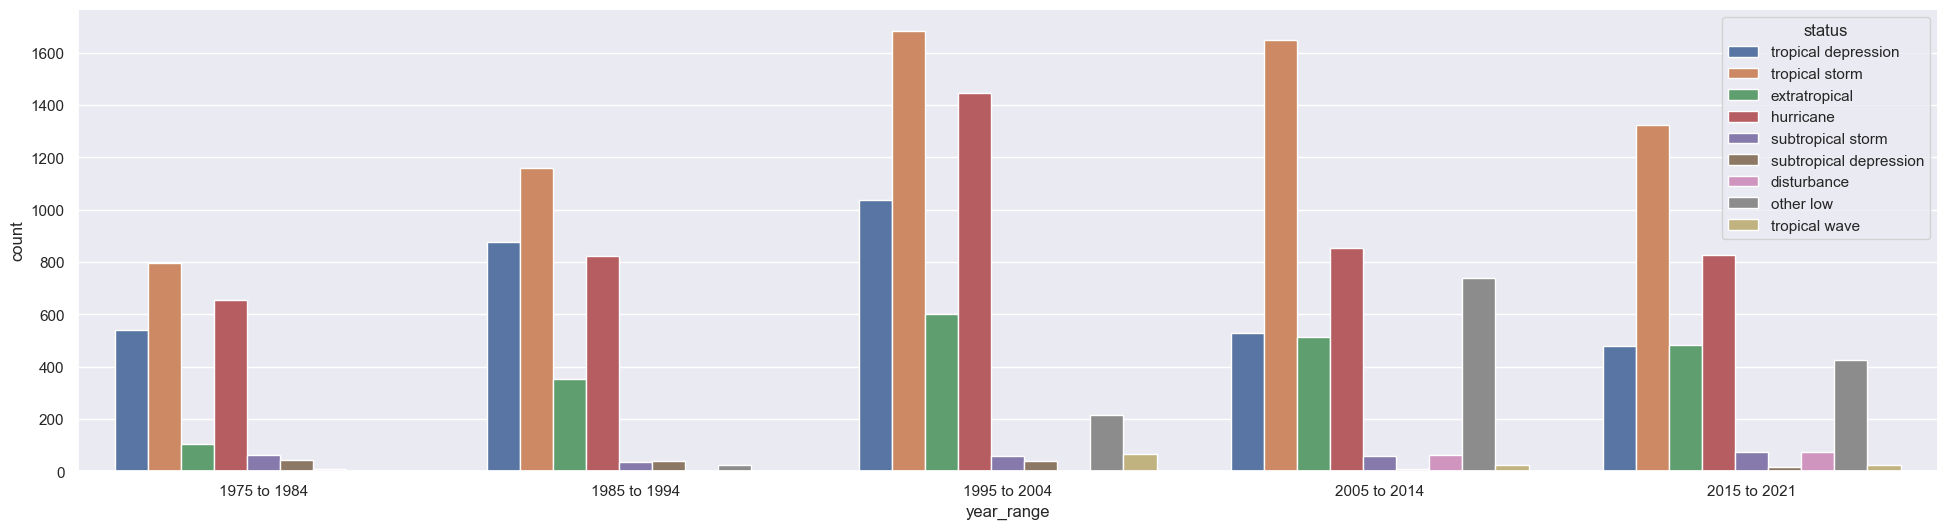

In [27]:
df['year_range'] = pd.cut(df['year'],bins=[1975,1985,1995,2005,2015,2022], labels = ['1975 to 1984','1985 to 1994','1995 to 2004','2005 to 2014','2015 to 2021'])
sns.countplot(data=df,x='year_range',hue = 'status')

Now that the quantity of each type of storm has been modelled, further models can build off of the information presented. In order to do this, a second DataFrame will be created to store the number of occurrences of each storm status each year.

In [29]:
status_count = df[['year','status']].value_counts().reset_index()
status_count = status_count.sort_values(by=['year'],axis=0,ascending=True)
status_count

,year,status,count
253,1975,subtropical depression,6
96,1975,hurricane,82
264,1975,subtropical storm,4
217,1975,extratropical,12
105,1975,tropical storm,72
...,...,...,...
82,2021,tropical depression,86
130,2021,other low,59
221,2021,subtropical storm,11
205,2021,disturbance,16


A line graph can now be charted using this DataFrame in order to more accurately examine storm trends overtime.

**Line Graph Showing Frequency of Storm Phenomena from 1975 to 2021**:

<Axes: xlabel='year', ylabel='count'>

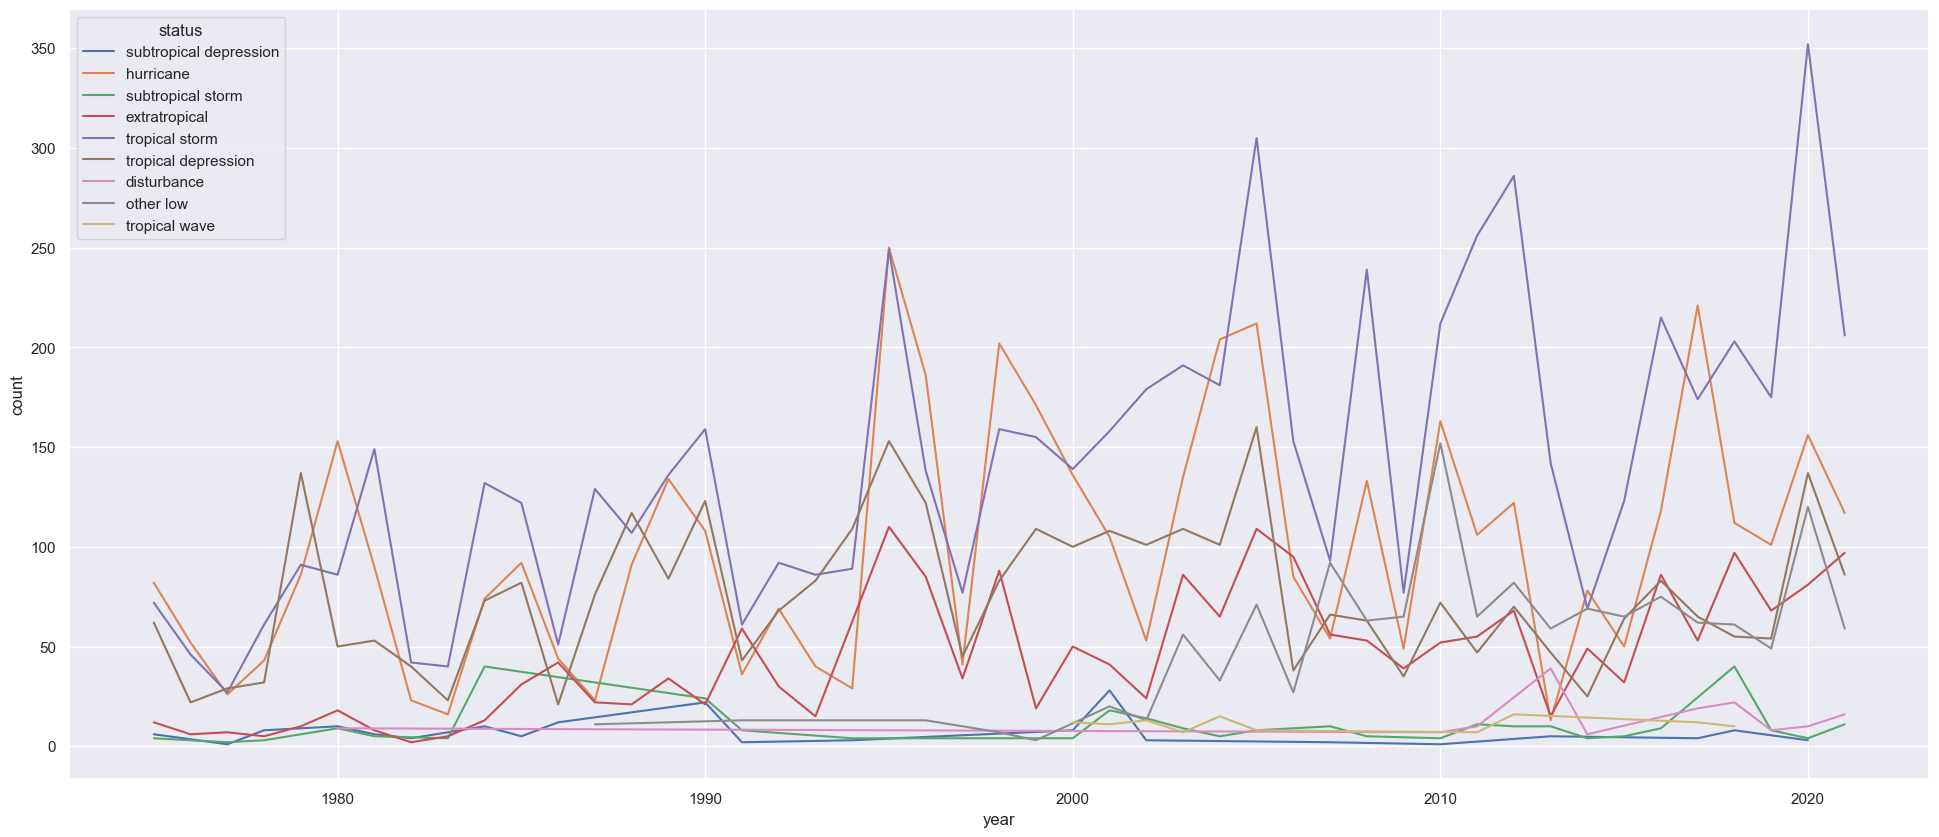

In [52]:
sns.lineplot(data=status_count, x='year',y='count',hue='status')

From the above, tentative conclusions can be made about which of the storm phenomena occur most frequently in the Atlantic. However, a more exact conclusion can be derived from a visualization showing what fraction of the total number of storms recorded between 1975 to 2021 each type of storm represents.

**Pie Chart Showing Relative Frequency of Each Type of Storm Recorded Between 1975 and 2021:**

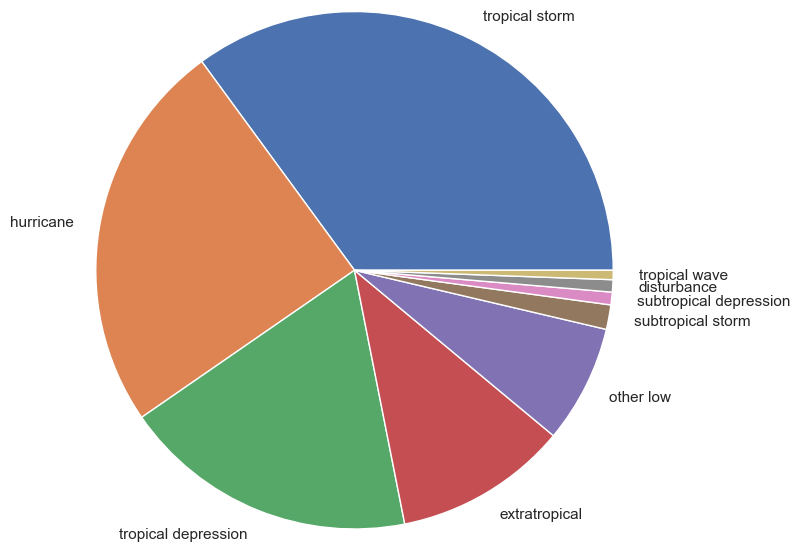

In [55]:
frequency = df['status'].value_counts().reset_index()
plt.rcParams['figure.figsize']=(6,6)
plt.pie(frequency['count'],labels=frequency['status'],radius=1.4)
plt.show()

The frequency of the storms in relation to one another has been thoroughly modelled. In order for the data to serve its intended purpose, it must now be used to illustrate the geographical distribution of each type of storm. In order to accomplish this, coordinate data will be used to map where each recorded instance occurred to gain a better understanding of the storm formations.

**Scatterplot Illustrating Geographical Distribution of Atlantic Storm Instances Recorded Between 1975 and 2021**

<Axes: xlabel='lat', ylabel='long'>

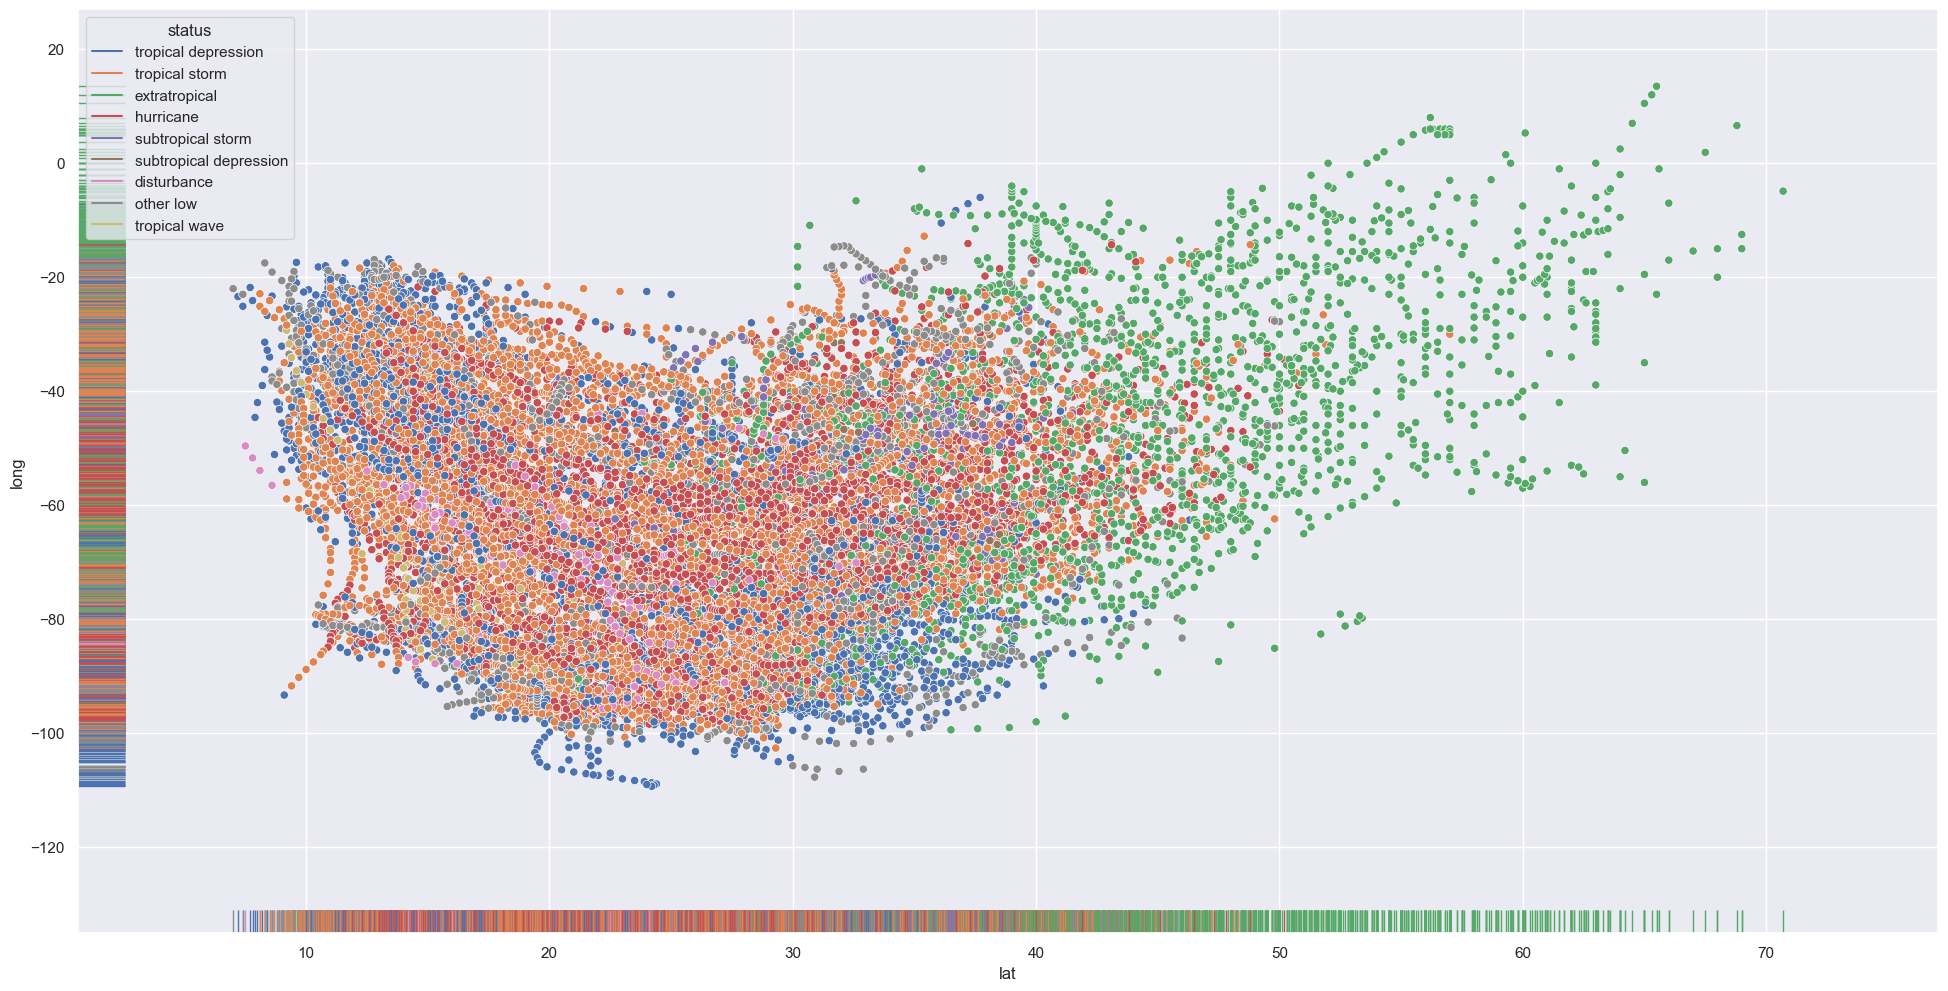

In [76]:
plt.rcParams['figure.figsize']=(24,12)
sns.scatterplot(data=df, x='lat',y='long',hue='status')
sns.rugplot(data=df, x='lat',y='long',hue='status')

The following visualizations model only data for Atlantic hurricanes, omitting data for all other storm phenomena.

<Axes: xlabel='year', ylabel='count'>

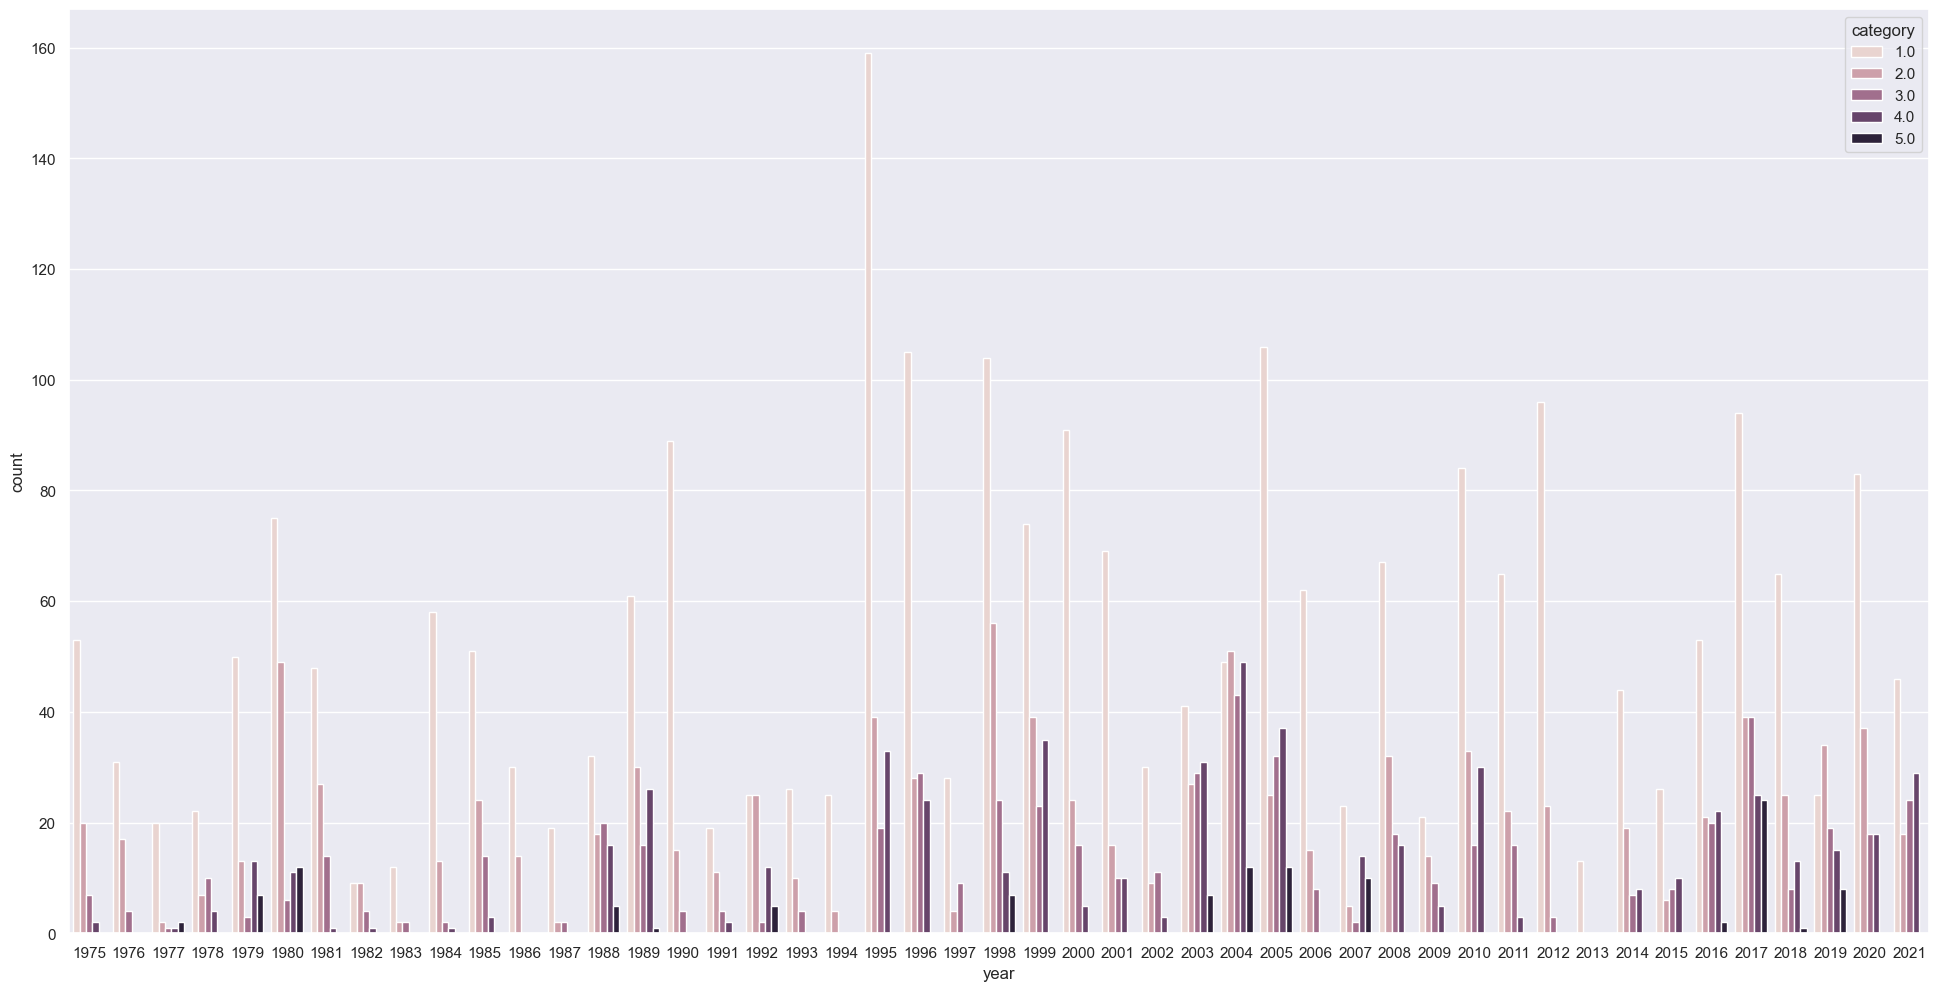

In [78]:
hurricanes = df.loc[df['category']!=0]
hurricanes = hurricanes.drop('status',axis=1)
sns.countplot(data=hurricanes,x='year',hue='category')

<Axes: xlabel='year_range', ylabel='count'>

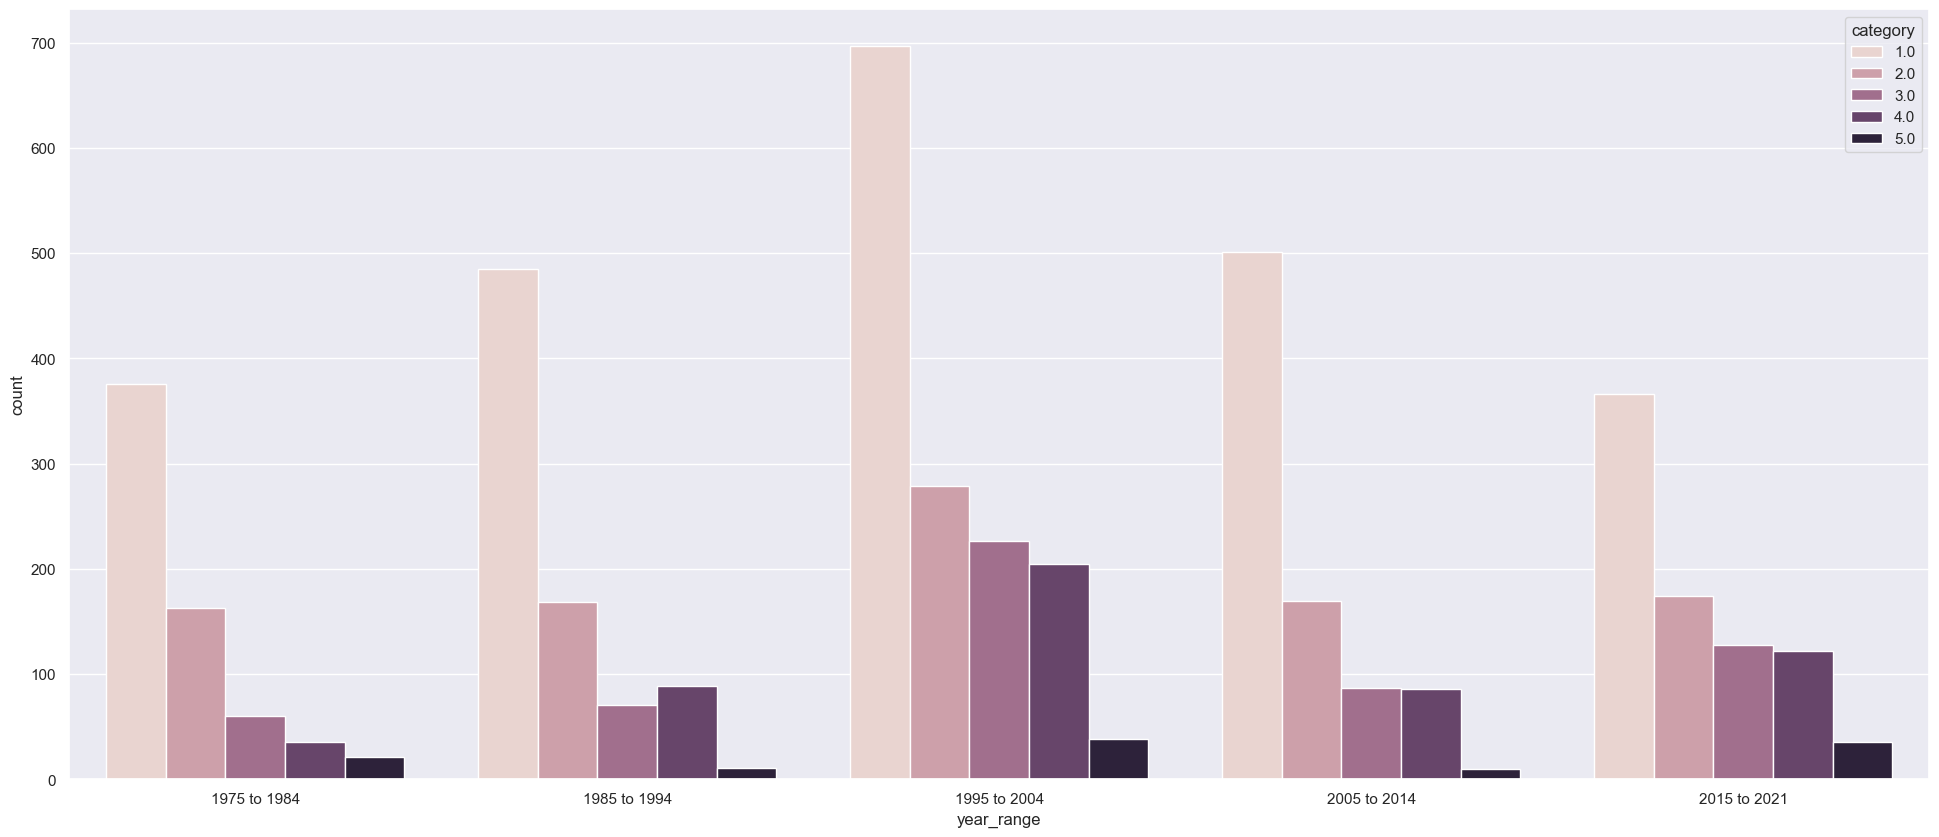

In [61]:
hurricanes['year_range'] = pd.cut(hurricanes['year'],bins=[1975,1985,1995,2005,2015,2022], labels = ['1975 to 1984','1985 to 1994','1995 to 2004','2005 to 2014','2015 to 2021'])
sns.countplot(data=hurricanes,x='year_range',hue = 'category')

<Axes: xlabel='year', ylabel='count'>

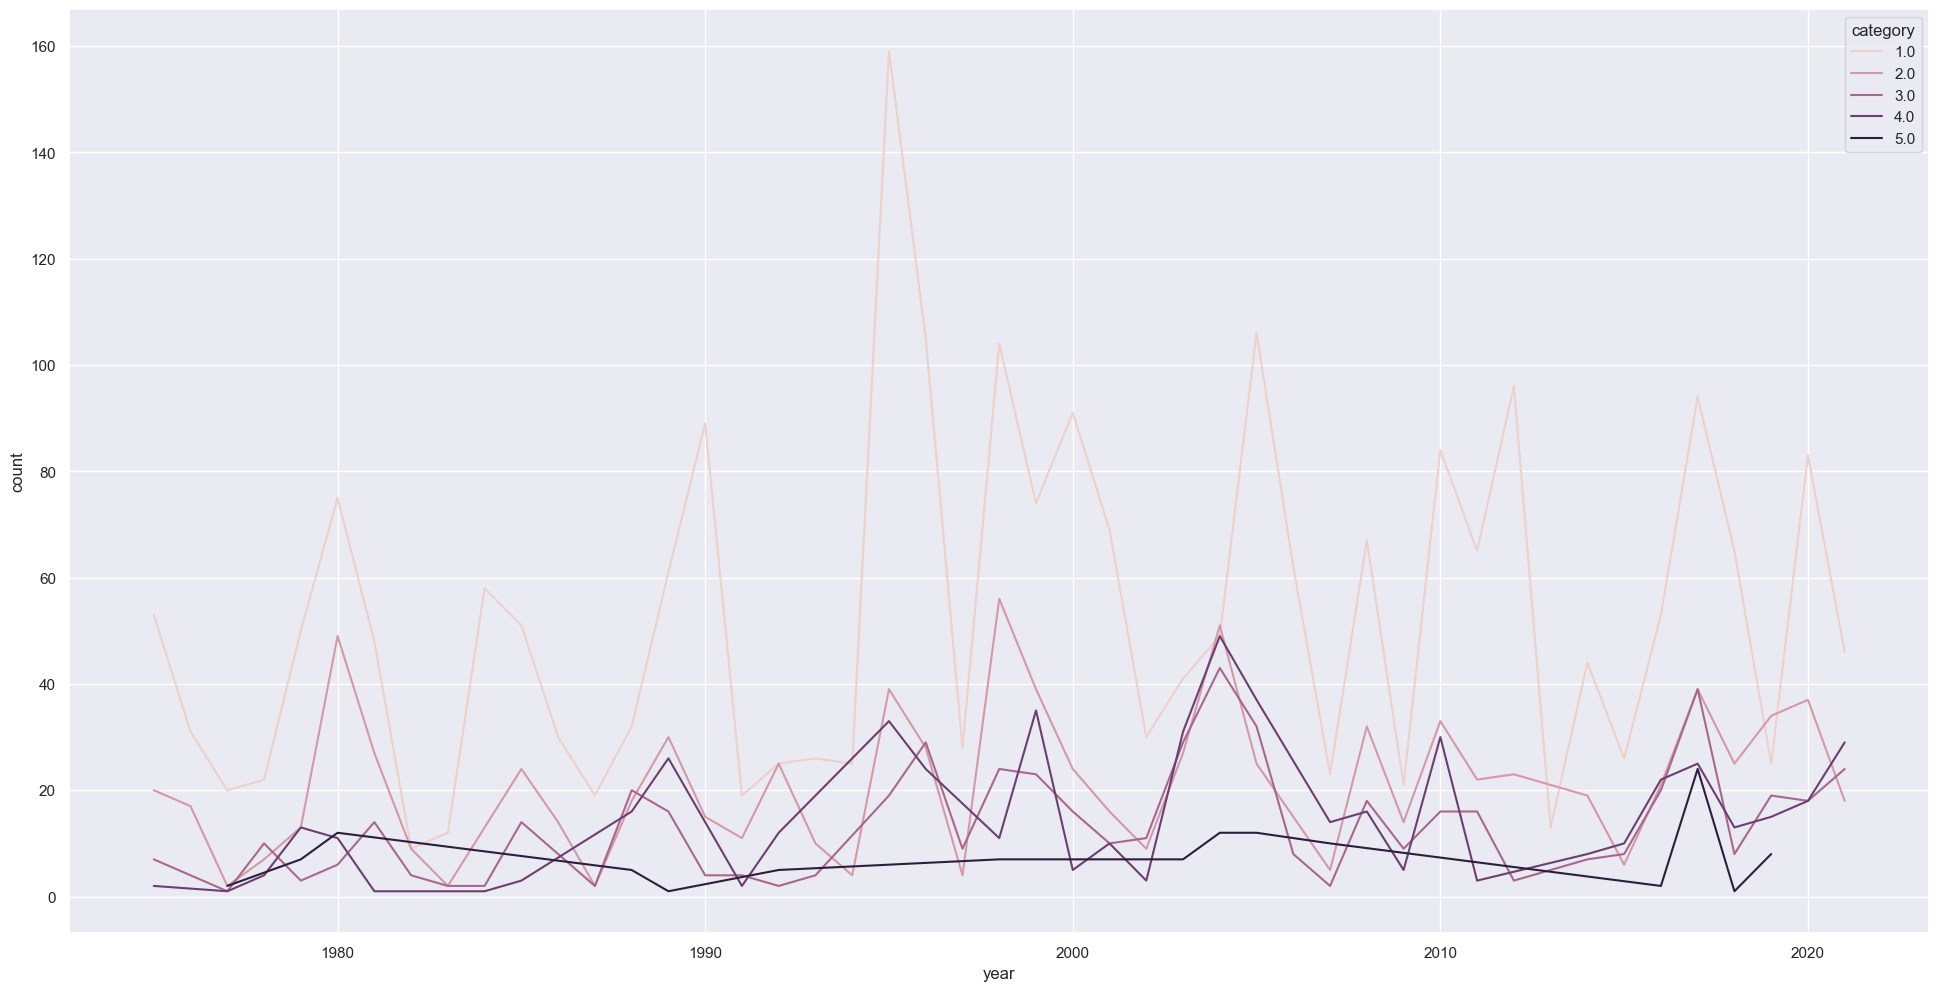

In [80]:
hurricane_categories = hurricanes[['year','category']].value_counts().reset_index()
sns.lineplot(data=hurricane_categories,x='year',y='count',hue='category')

**Scatterplot Illustrating Geographical Distribution of Atlantic Hurricanes Recorded Between 1975 and 2021**

<Axes: xlabel='lat', ylabel='long'>

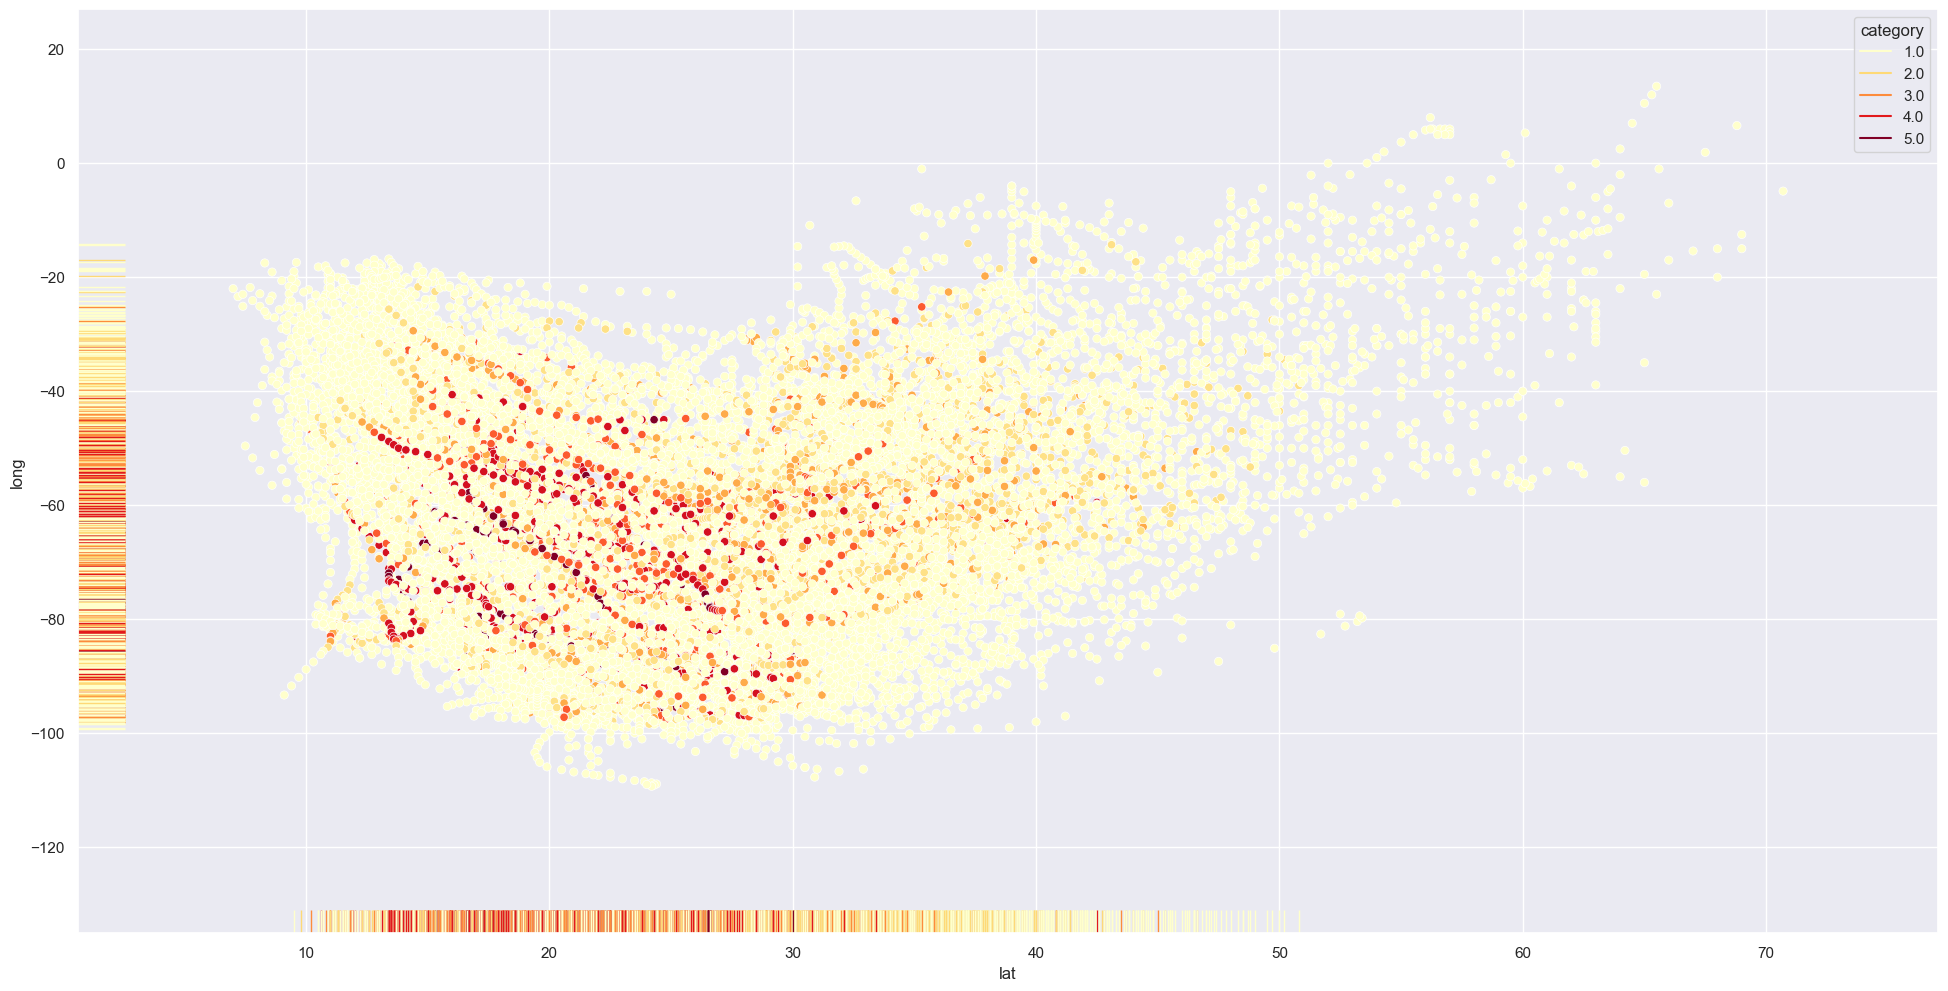

In [83]:
sns.scatterplot(data=df, x='lat',y='long',hue='category',palette='YlOrRd')
sns.rugplot(data=hurricanes, x='lat',y='long',hue='category',palette='YlOrRd')